In [494]:
#Import linear algebra and data manipulation
import numpy as np
import pandas as pd

#Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics


import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor

from wordcloud import WordCloud

In [448]:
listings_am_df = pd.read_csv('../input/airbnb/listings_am.csv')
listings_ba_df = pd.read_csv('../input/airbnb/listings_ba.csv')

In [449]:
print('Shape of AM: %s, shape of BA: %s' % (str(listings_am_df.shape), str(listings_ba_df.shape)))

Shape of AM: (19635, 106), shape of BA: (21116, 106)


In [450]:
check = listings_am_df.columns.tolist() == listings_ba_df.columns.tolist()
print('Both file has the same columns: %s' % (check))

Both file has the same columns: True


In [451]:
listings_am_df.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [452]:
listings_am_df.info

<bound method DataFrame.info of              id                            listing_url       scrape_id  \
0          2818      https://www.airbnb.com/rooms/2818  20200313233926   
1         20168     https://www.airbnb.com/rooms/20168  20200313233926   
2         25428     https://www.airbnb.com/rooms/25428  20200313233926   
3         27886     https://www.airbnb.com/rooms/27886  20200313233926   
4         28871     https://www.airbnb.com/rooms/28871  20200313233926   
...         ...                                    ...             ...   
19630  42886432  https://www.airbnb.com/rooms/42886432  20200313233926   
19631  42888420  https://www.airbnb.com/rooms/42888420  20200313233926   
19632  42888759  https://www.airbnb.com/rooms/42888759  20200313233926   
19633  42889001  https://www.airbnb.com/rooms/42889001  20200313233926   
19634  42889614  https://www.airbnb.com/rooms/42889614  20200313233926   

      last_scraped                                               name  \
0     

In [453]:
listings_ba_df.info

<bound method DataFrame.info of              id                            listing_url       scrape_id  \
0         23197     https://www.airbnb.com/rooms/23197  20200316025159   
1         25786     https://www.airbnb.com/rooms/25786  20200316025159   
2         31958     https://www.airbnb.com/rooms/31958  20200316025159   
3         32471     https://www.airbnb.com/rooms/32471  20200316025159   
4         32711     https://www.airbnb.com/rooms/32711  20200316025159   
...         ...                                    ...             ...   
21111  42910205  https://www.airbnb.com/rooms/42910205  20200316025159   
21112  42912468  https://www.airbnb.com/rooms/42912468  20200316025159   
21113  42912731  https://www.airbnb.com/rooms/42912731  20200316025159   
21114  42913748  https://www.airbnb.com/rooms/42913748  20200316025159   
21115  42914062  https://www.airbnb.com/rooms/42914062  20200316025159   

      last_scraped                                               name  \
0     

In [454]:
#Cleaning data
listings_am_df.duplicated().sum()
listings_am_df.drop_duplicates(inplace=True)
print('Amsterdam Data')
print(listings_am_df.isnull().sum())
print("")
listings_ba_df.duplicated().sum()
listings_ba_df.drop_duplicates(inplace=True)
print('Barcelona Data')
print(listings_ba_df.isnull().sum())

Amsterdam Data
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                              33
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               2253
Length: 106, dtype: int64

Barcelona Data
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                              15
                                                ... 
calculated_host_listings_count            

In [455]:
listings_am_df.drop(['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'is_location_exact',
 'property_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'calendar_last_scraped',
 'number_of_reviews_ltm',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'requires_license',
 'license',
 'jurisdiction_names',
 'instant_bookable',
 'is_business_travel_ready',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 ], axis=1, inplace=True)

In [456]:
listings_ba_df.drop(['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'is_location_exact',
 'property_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'calendar_last_scraped',
 'number_of_reviews_ltm',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'requires_license',
 'license',
 'jurisdiction_names',
 'instant_bookable',
 'is_business_travel_ready',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 ], axis=1, inplace=True)

In [457]:
listings_am_df.head(5)

,host_id,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews,calculated_host_listings_count,reviews_per_month
0,3159,Oostelijk Havengebied - Indische Buurt,NaN,52.36575,4.94142,Private room,$59.00,3,81,278,1,2.08
1,59484,Centrum-Oost,NaN,52.36509,4.89354,Private room,$100.00,1,164,331,2,2.71
2,56142,Centrum-West,NaN,52.37297,4.88339,Entire home/apt,$125.00,14,132,5,1,0.19
3,97647,Centrum-West,NaN,52.38761,4.89188,Private room,$155.00,2,151,217,1,2.18
4,124245,Centrum-West,NaN,52.36719,4.89092,Private room,$75.00,2,146,329,3,2.83


In [458]:
listings_ba_df.head(5)

,host_id,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews,calculated_host_listings_count,reviews_per_month
0,90417,el Besòs i el Maresme,Sant Martí,41.41291,2.22063,Entire home/apt,$220.00,3,343,52,2,0.47
1,108310,la Vila de Gràcia,Gràcia,41.40145,2.15645,Private room,$42.00,1,117,274,1,2.34
2,136853,el Camp d'en Grassot i Gràcia Nova,Gràcia,41.40950,2.15938,Entire home/apt,$60.00,1,278,187,30,1.69
3,136853,el Camp d'en Grassot i Gràcia Nova,Gràcia,41.40928,2.16112,Entire home/apt,$65.00,1,268,93,30,0.83
4,135703,el Camp d'en Grassot i Gràcia Nova,Gràcia,41.40566,2.17015,Entire home/apt,$140.00,2,290,63,13,0.60


In [459]:
listings_am_df.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
listings_am_df.reviews_per_month.isnull().sum()

0

In [460]:
listings_ba_df.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
listings_ba_df.reviews_per_month.isnull().sum()

0

In [461]:
listings_ba_df.isnull().sum()
listings_ba_df.dropna(how='any',inplace=True)
listings_ba_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21116 entries, 0 to 21115
Data columns (total 12 columns):
host_id                           21116 non-null int64
neighbourhood_cleansed            21116 non-null object
neighbourhood_group_cleansed      21116 non-null object
latitude                          21116 non-null float64
longitude                         21116 non-null float64
room_type                         21116 non-null object
price                             21116 non-null object
minimum_nights                    21116 non-null int64
availability_365                  21116 non-null int64
number_of_reviews                 21116 non-null int64
calculated_host_listings_count    21116 non-null int64
reviews_per_month                 21116 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 2.1+ MB


In [462]:
listings_ba_df.describe()

,host_id,latitude,longitude,minimum_nights,availability_365,number_of_reviews,calculated_host_listings_count,reviews_per_month
count,2.111600e+04,21116.000000,21116.000000,21116.000000,21116.000000,21116.000000,21116.000000,21116.000000
mean,1.096918e+08,41.391937,2.167566,9.207994,188.726700,35.938293,14.882269,1.223072
std,1.102097e+08,0.014895,0.017939,20.331695,127.740788,65.147845,31.119033,1.587172
min,3.073000e+03,41.349670,2.072940,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.478280e+06,41.380300,2.157020,1.000000,73.000000,1.000000,1.000000,0.020000
50%,6.250367e+07,41.388830,2.168350,2.000000,201.000000,7.000000,2.000000,0.570000
75%,1.937119e+08,41.401950,2.178022,4.000000,305.000000,42.000000,11.000000,1.960000
max,3.416877e+08,41.464010,2.230120,1124.000000,365.000000,729.000000,159.000000,33.260000


In [463]:
listings_ba_df.columns

Index(['host_id', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'availability_365', 'number_of_reviews',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

Index(['host_id', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'availability_365', 'number_of_reviews',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

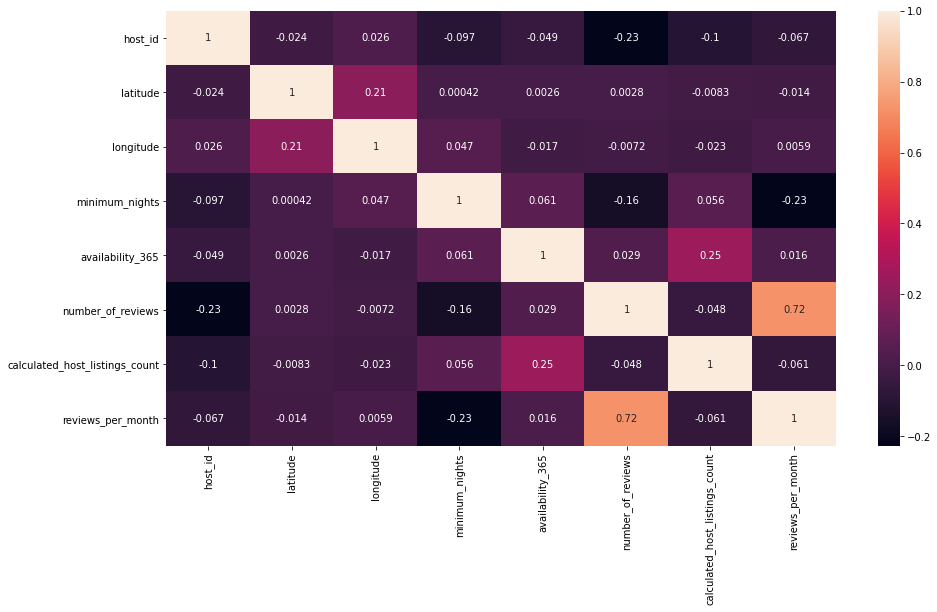

In [464]:
corr = listings_ba_df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
listings_ba_df.columns

In [465]:
listings_ba_df.shape

(21116, 12)

In [466]:
listings_ba_df.head(5)

,host_id,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews,calculated_host_listings_count,reviews_per_month
0,90417,el Besòs i el Maresme,Sant Martí,41.41291,2.22063,Entire home/apt,$220.00,3,343,52,2,0.47
1,108310,la Vila de Gràcia,Gràcia,41.40145,2.15645,Private room,$42.00,1,117,274,1,2.34
2,136853,el Camp d'en Grassot i Gràcia Nova,Gràcia,41.40950,2.15938,Entire home/apt,$60.00,1,278,187,30,1.69
3,136853,el Camp d'en Grassot i Gràcia Nova,Gràcia,41.40928,2.16112,Entire home/apt,$65.00,1,268,93,30,0.83
4,135703,el Camp d'en Grassot i Gràcia Nova,Gràcia,41.40566,2.17015,Entire home/apt,$140.00,2,290,63,13,0.60


In [467]:
listings_ba_df['neighbourhood_group_cleansed'].unique()

array(['Sant Martí', 'Gràcia', 'Ciutat Vella', 'Eixample',
       'Sants-Montjuïc', 'Sarrià-Sant Gervasi', 'Les Corts',
       'Horta-Guinardó', 'Sant Andreu', 'Nou Barris'], dtype=object)

Text(0.5, 1.0, 'Neighbourhood Group')

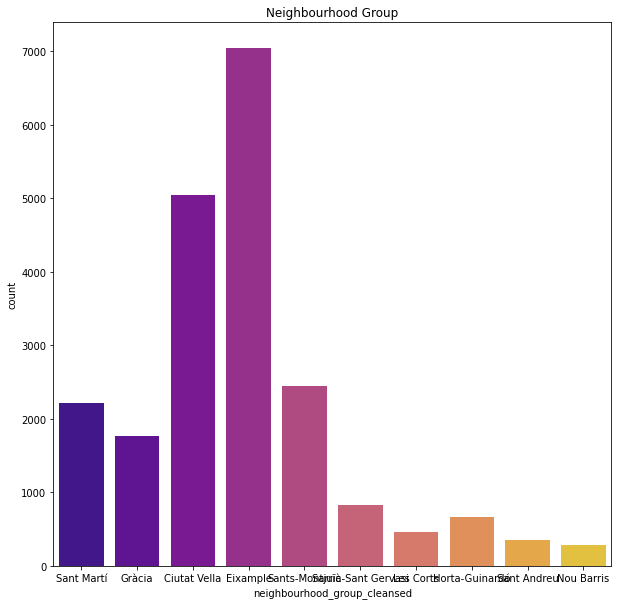

In [468]:
sns.countplot(listings_ba_df['neighbourhood_group_cleansed'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

Text(0.5, 1.0, 'Neighbourhood')

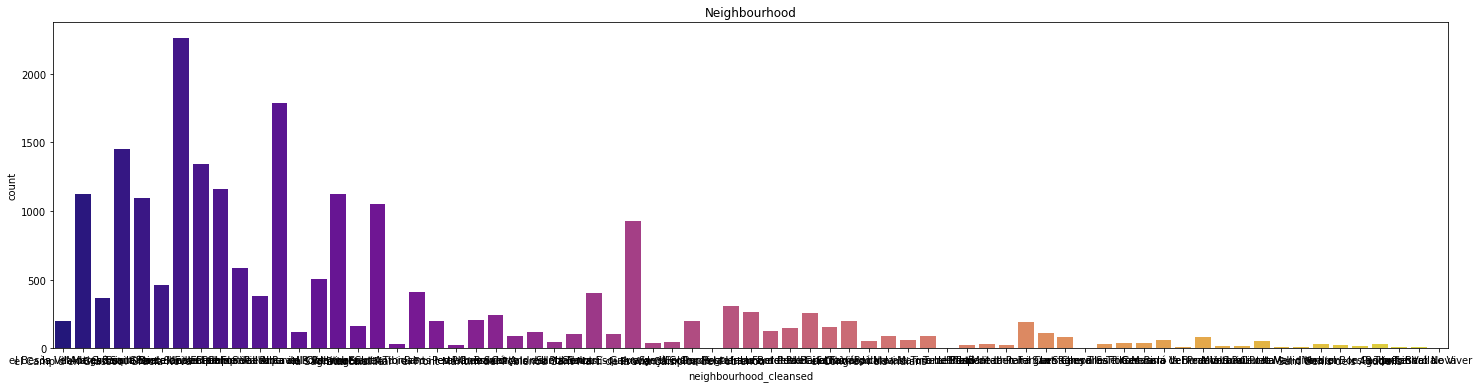

In [469]:
sns.countplot(listings_ba_df['neighbourhood_cleansed'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

Text(0.5, 1.0, 'Restaurants delivering online or Not')

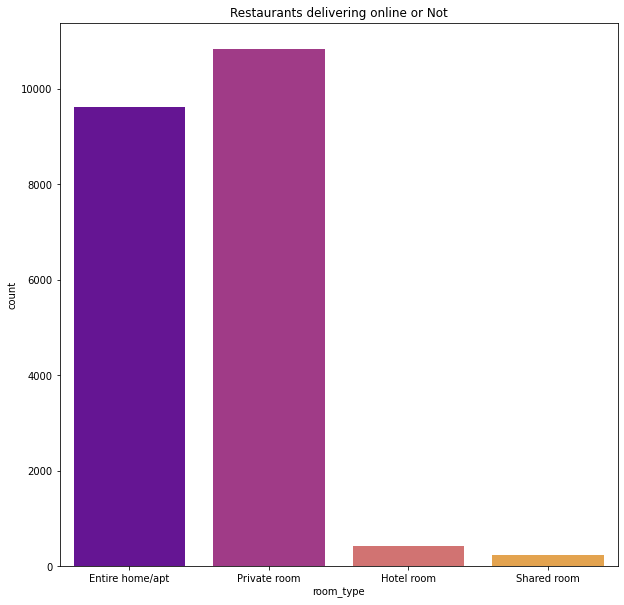

In [470]:
sns.countplot(listings_ba_df['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

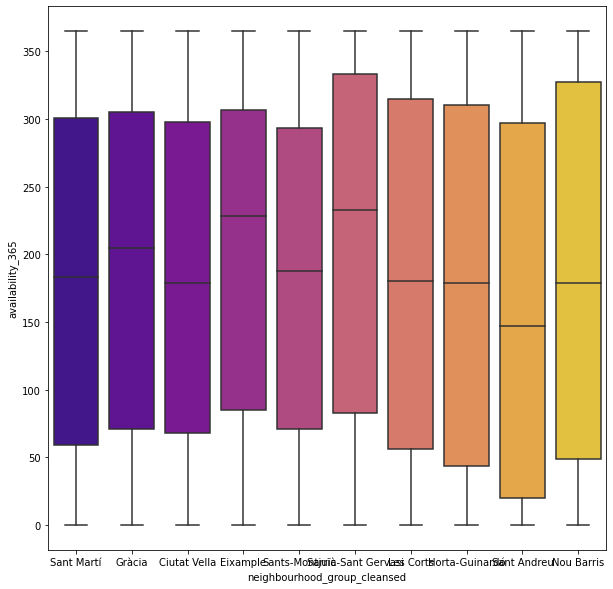

In [471]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=listings_ba_df, x='neighbourhood_group_cleansed',y='availability_365',palette='plasma')

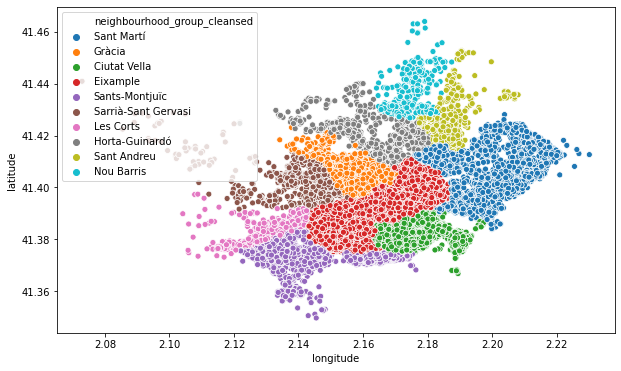

In [472]:
plt.figure(figsize=(10,6))
sns.scatterplot(listings_ba_df.longitude,listings_ba_df.latitude,hue=listings_ba_df.neighbourhood_group_cleansed)
plt.ioff()

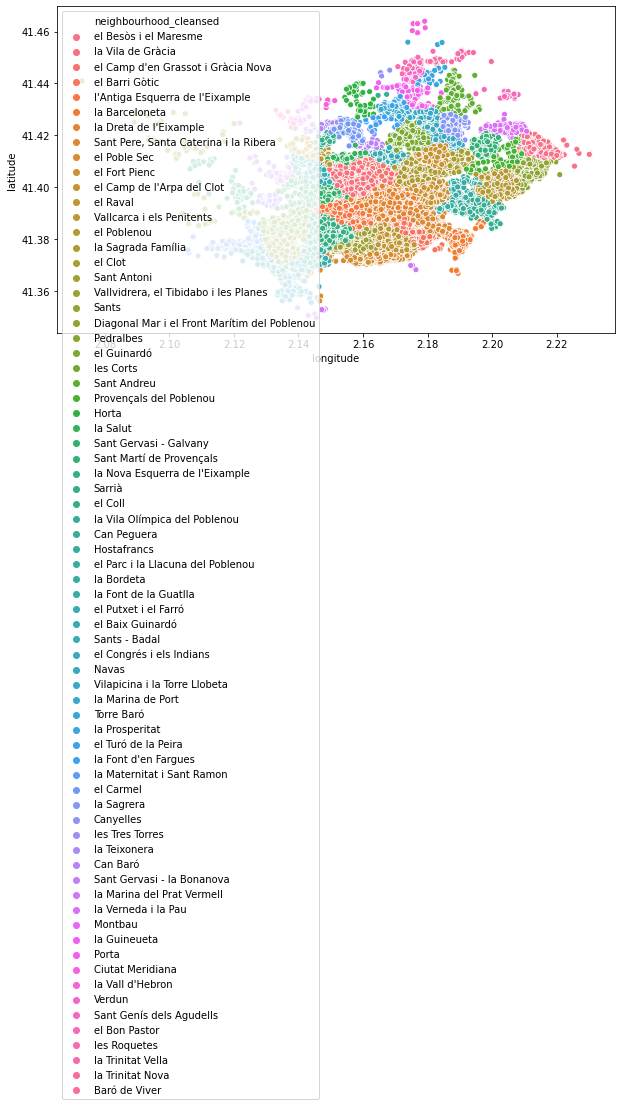

In [473]:
plt.figure(figsize=(10,6))
sns.scatterplot(listings_ba_df.longitude,listings_ba_df.latitude,hue=listings_ba_df.neighbourhood_cleansed)
plt.ioff()

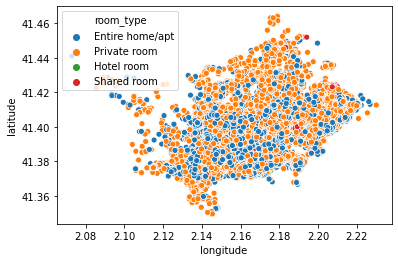

In [474]:
sns.scatterplot(listings_ba_df.longitude,listings_ba_df.latitude,hue=listings_ba_df.room_type)
plt.ioff()

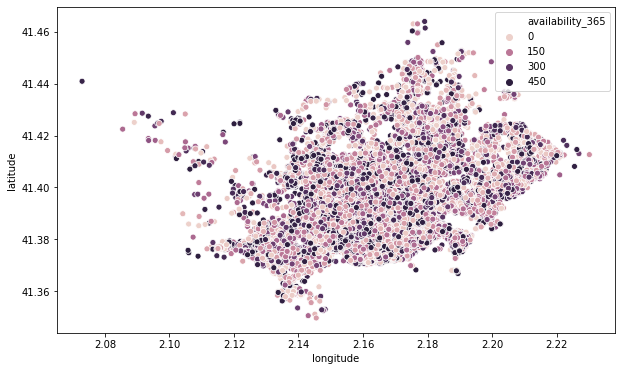

In [475]:
plt.figure(figsize=(10,6))
sns.scatterplot(listings_ba_df.longitude,listings_ba_df.latitude,hue=listings_ba_df.availability_365)
plt.ioff()

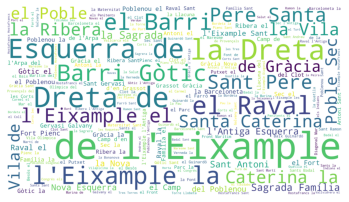

In [476]:
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(listings_ba_df.neighbourhood_cleansed))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

In [477]:
import folium
from folium.plugins import HeatMap
m=folium.Map([41.3887901,-2.1589899],zoom_start=11)
HeatMap(listings_ba_df[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

In [478]:
listings_ba_df.drop(['host_id','latitude','longitude','neighbourhood_cleansed','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
#examing the changes
listings_ba_df.head(5)

,neighbourhood_group_cleansed,room_type,price,minimum_nights,availability_365,calculated_host_listings_count
0,Sant Martí,Entire home/apt,$220.00,3,343,2
1,Gràcia,Private room,$42.00,1,117,1
2,Gràcia,Entire home/apt,$60.00,1,278,30
3,Gràcia,Entire home/apt,$65.00,1,268,30
4,Gràcia,Entire home/apt,$140.00,2,290,13


In [479]:
def Encode(listings_ba_df):
    for column in listings_ba_df.columns[listings_ba_df.columns.isin(['neighbourhood_group_cleansed', 'room_type'])]:
        listings_ba_df[column] = listings_ba_df[column].factorize()[0]
    return listings_ba_df

listings_ba_df_en = Encode(listings_ba_df.copy())

In [480]:
listings_ba_df_en.head(15)

,neighbourhood_group_cleansed,room_type,price,minimum_nights,availability_365,calculated_host_listings_count
0,0,0,$220.00,3,343,2
1,1,1,$42.00,1,117,1
2,1,0,$60.00,1,278,30
3,1,0,$65.00,1,268,30
4,1,0,$140.00,2,290,13
5,2,1,$100.00,5,180,2
6,2,0,$227.00,5,58,2
7,3,1,$40.00,2,283,3
8,3,1,$30.00,2,338,3
9,3,1,$45.00,2,327,3


Index(['neighbourhood_group_cleansed', 'room_type', 'price', 'minimum_nights',
       'availability_365', 'calculated_host_listings_count'],
      dtype='object')

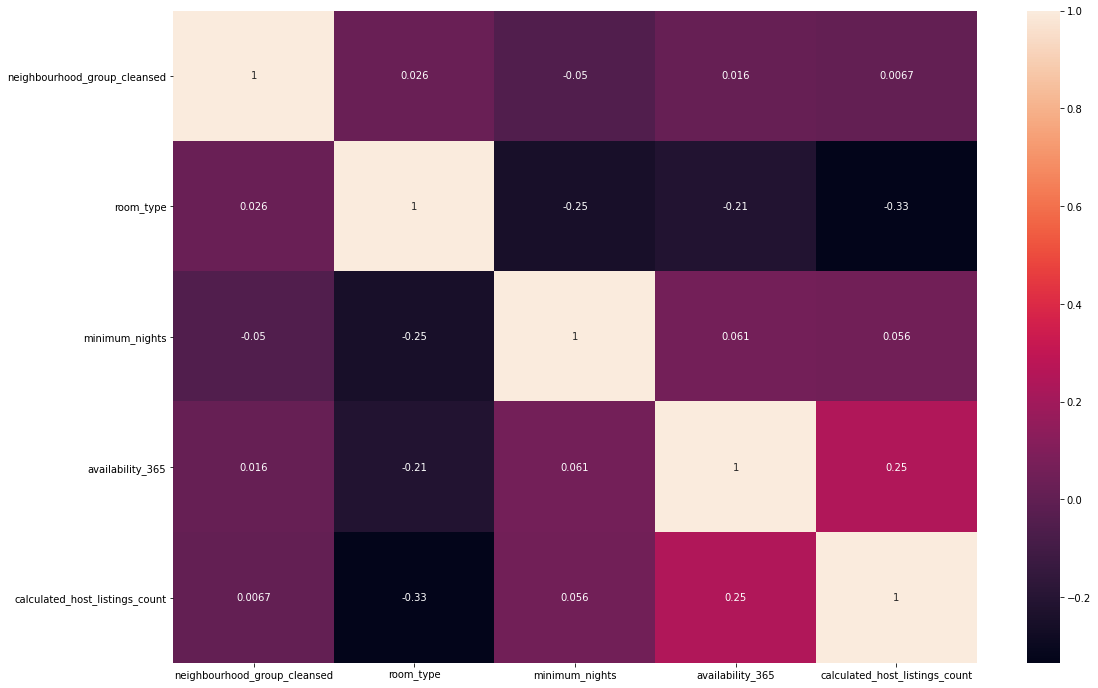

In [481]:
corr = listings_ba_df_en.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True)
listings_ba_df_en.columns


In [503]:
x = listings_ba_df_en.iloc[:,[0,1,3,4,5]]
y = listings_ba_df_en['price']
#################################
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
print(x_train.head())
print(y_train.head())

       neighbourhood_group_cleansed  room_type  minimum_nights  \
10289                             4          1               1   
14943                             1          1               2   
8001                              2          1              32   
3139                              5          1              31   
14839                             2          1              36   

       availability_365  calculated_host_listings_count  
10289               119                               6  
14943                45                               1  
8001                332                               2  
3139                205                               1  
14839               365                               1  


10289    $17.00
14943    $65.00
8001     $33.00
3139     $28.00
14839    $32.00
Name: price, dtype: object

In [501]:
x_train.shape

(19004, 5)

In [502]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

ValueError: could not convert string to float: '$17.00'

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
r2_score(y_test,y_predict)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)